## 기본 라이브러리 임포트 💫
---

In [ ]:
!pip --version


!pip install pycaret



In [100]:
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=2a740a586cbd8edb8ef2d4150ee601765a4762760b57389eb6499ff159d2b0de
  Stored in directory: c:\users\gidtn\appdata\local\pip\cache\wheels\06\7e\ad\1cb03e935234186825cefc7e2c8f3451b4f654b5bc72232a7b
Successfully built import-ipynb


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

font = {'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

import import_ipynb

from use_function import *


importing Jupyter notebook from use_function.ipynb


#### DATASET 넣기 💫
---

In [41]:
dataset = pd.read_csv('Data/#Final_Check.csv',encoding='cp949',index_col=0)
dataset.head(1)

,품종,색상,성별,체중,중성화여부,당시의나이,상태,접수일,직영,위탁
0,7,1,0,3.1,0,3,1,2017,1.0,NaN


In [42]:
dataset.drop('접수일',axis=1,inplace=True)

In [43]:
dataset = dataset.fillna(0)

dataset.drop('위탁',axis=1,inplace=True)

In [44]:
dataset['직영'] = pd.Categorical(dataset['직영'])

In [46]:
dataset = dataset[['품종','체중','색상','성별','중성화여부','당시의나이','직영','상태']]


In [47]:
change_category(dataset)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337426 entries, 0 to 337425
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   품종      337426 non-null  category
 1   체중      337426 non-null  float64 
 2   색상      337426 non-null  category
 3   성별      337426 non-null  category
 4   중성화여부   337426 non-null  category
 5   당시의나이   337426 non-null  int64   
 6   직영      337426 non-null  category
 7   상태      337426 non-null  category
dtypes: category(6), float64(1), int64(1)
memory usage: 9.7 MB


In [62]:
dataset

,품종,체중,색상,성별,중성화여부,당시의나이,직영,상태
0,7,3.10,1,0,0,3,1.0,1
1,3,7.95,2,0,0,3,1.0,1
2,4,2.75,4,1,0,2,1.0,1
3,4,4.00,3,0,1,1,1.0,1
4,7,3.00,3,1,1,5,1.0,1
...,...,...,...,...,...,...,...,...
337421,3,3.50,1,0,2,3,0.0,1
337422,9,7.20,1,1,1,2,0.0,1
337423,9,3.74,5,1,0,0,0.0,0
337424,9,8.00,4,1,0,3,0.0,0


### Over_Sampling 💤
---

In [63]:
over_sampling_list = over_sampling(dataset)

In [64]:
# 원본

X = dataset.iloc[:,:-1]
Y = dataset['상태']                

# 1번째 RandomOverSampling

X_1 = over_sampling_list[0][0]
Y_1 = over_sampling_list[0][1]

# 2번째 SMOTE --> NaN 값이 생성되는 이유가 뭐지
X_2 = over_sampling_list[1][0]
Y_2 = over_sampling_list[1][1]

# 3번째 ADAYSN --> NaN 값이 생성되는 이유는..? 

X_3 = over_sampling_list[2][0]
Y_3 = over_sampling_list[2][1]




In [65]:
model_study_function(X,Y,0.2,0)

Train 완료 

KNN 정확도 : 0.6499
랜덤 포레스트 정확도 : 0.6817
결정 트리 정확도 : 0.6632
에이다부스트 정확도 : 0.6778
MLPClassfier 정확도 : 0.6802
GradientBoostingClassifer : 0.6815
GaussianNB 정확도 : 0.6322
ExtraTreeclassifer 정확도 : 0.6642
최종 메타 모델의 예측 정확도 : 0.6834
최종 모델의 f1_score :  0.5103818123481689
최종 모델의 Confusion Matrix : 
 [[142686  18390]
 [ 79600  29264]]
완료


In [66]:
model_study_function(X_1,Y_1,0.2,0)

Train 완료 

KNN 정확도 : 0.6318
랜덤 포레스트 정확도 : 0.6628
결정 트리 정확도 : 0.6572
에이다부스트 정확도 : 0.6468
MLPClassfier 정확도 : 0.6493
GradientBoostingClassifer : 0.6493
GaussianNB 정확도 : 0.6028
ExtraTreeclassifer 정확도 : 0.6578
최종 메타 모델의 예측 정확도 : 0.6599
최종 모델의 f1_score :  0.6514474772539289
최종 모델의 Confusion Matrix : 
 [[126146  34930]
 [ 93277  67799]]
완료


In [71]:


model_study_function(X_2,Y_2,0.2,0)

ValueError: Found input variables with inconsistent numbers of samples: [396658, 402690]

In [ ]:
model_study_function(X_3,Y_3,0.2,0)

### Under(Down)_ Sampling 💤
---

In [48]:
down_sampling_list = under_sampling(dataset)

In [49]:
# 1 번 RandomUnderSampling

X_D_1 = down_sampling_list[0][0]
Y_D_1 = down_sampling_list[0][1]

# 2 번 Tomek's

X_D_2 = down_sampling_list[1][0]
Y_D_2 = down_sampling_list[1][1]

# 3번 ENN 

X_D_3 = down_sampling_list[2][0]
Y_D_3 = down_sampling_list[2][1]

# 4번 NCR

X_D_4 = down_sampling_list[3][0]
Y_D_4 = down_sampling_list[3][1]


### Stacking 💫
    Model 들을 쌓아서, 정확도를 올리자
       💢 아무것도 안건드린거
   ----

In [50]:
model_study_function(X_D_1,Y_D_1, 0.2, 5)

Train 완료 

KNN 정확도 : 0.6224
랜덤 포레스트 정확도 : 0.6493
결정 트리 정확도 : 0.6284
에이다부스트 정확도 : 0.6450
MLPClassfier 정확도 : 0.6483
GradientBoostingClassifer : 0.6479
GaussianNB 정확도 : 0.6026
ExtraTreeclassifer 정확도 : 0.6303
최종 메타 모델의 예측 정확도 : 0.6489
최종 모델의 f1_score :  0.6389571131683356
최종 모델의 Confusion Matrix : 
 [[85161 23704]
 [62971 45893]]
완료


In [51]:
model_study_function(X_D_2,Y_D_2, 0.2, 5)

Train 완료 

KNN 정확도 : 0.6556
랜덤 포레스트 정확도 : 0.6855
결정 트리 정확도 : 0.6705
에이다부스트 정확도 : 0.6784
MLPClassfier 정확도 : 0.6823
GradientBoostingClassifer : 0.6822
GaussianNB 정확도 : 0.6342
ExtraTreeclassifer 정확도 : 0.6712
최종 메타 모델의 예측 정확도 : 0.6846
최종 모델의 f1_score :  0.5437220457639205
최종 모델의 Confusion Matrix : 
 [[140089  18831]
 [ 78537  30328]]
완료


In [53]:
model_study_function(X_D_3,Y_D_3, 0.2, 5)

Train 완료 

KNN 정확도 : 0.8459
랜덤 포레스트 정확도 : 0.8593
결정 트리 정확도 : 0.8812
에이다부스트 정확도 : 0.7443
MLPClassfier 정확도 : 0.7619
GradientBoostingClassifer : 0.7500
GaussianNB 정확도 : 0.7171
ExtraTreeclassifer 정확도 : 0.8814
최종 메타 모델의 예측 정확도 : 0.8866
최종 모델의 f1_score :  0.9124908523668297
최종 모델의 Confusion Matrix : 
 [[  8159  43304]
 [  8068 100797]]
완료


In [54]:
model_study_function(X_D_4,Y_D_4, 0.2, 5)

Train 완료 

KNN 정확도 : 0.7576
랜덤 포레스트 정확도 : 0.7823
결정 트리 정확도 : 0.7831
에이다부스트 정확도 : 0.7008
MLPClassfier 정확도 : 0.7159
GradientBoostingClassifer : 0.7132
GaussianNB 정확도 : 0.6292
ExtraTreeclassifer 정확도 : 0.7836
최종 메타 모델의 예측 정확도 : 0.7880
최종 모델의 f1_score :  0.7924908757284294
최종 모델의 Confusion Matrix : 
 [[28769 56568]
 [22831 86034]]
완료


## autoencoder 💫
---
    정리할 필요가 있을 듯 ✅

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(data = df, target = '상태', train_size = 0.8, session_id = 6)

In [290]:
models(internal = True)[['Name', 'GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Logistic Regression,False
knn,K Neighbors Classifier,False
nb,Naive Bayes,False
dt,Decision Tree Classifier,False
svm,SVM - Linear Kernel,False
rbfsvm,SVM - Radial Kernel,False
gpc,Gaussian Process Classifier,False
mlp,MLP Classifier,False
ridge,Ridge Classifier,False


In [292]:
best3models = compare_models(sort = 'F1', n_select = 3, fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6582,0.6928,0.8094,0.6678,0.7318,0.2724,0.2821,1.2950
lightgbm,Light Gradient Boosting Machine,0.6617,0.6977,0.7988,0.6742,0.7312,0.2835,0.2910,0.6750
ridge,Ridge Classifier,0.6493,0.0000,0.8078,0.6598,0.7263,0.2518,0.2619,0.1150
lr,Logistic Regression,0.6499,0.6823,0.8054,0.6611,0.7261,0.2540,0.2636,0.2550
ada,Ada Boost Classifier,0.6502,0.6850,0.8033,0.6618,0.7257,0.2550,0.2643,0.6300
lda,Linear Discriminant Analysis,0.6491,0.6823,0.8059,0.6601,0.7257,0.2518,0.2616,0.1800
nb,Naive Bayes,0.6408,0.6508,0.7512,0.6672,0.7067,0.2475,0.2504,0.1400
svm,SVM - Linear Kernel,0.6367,0.0000,0.7130,0.6753,0.6929,0.2487,0.2502,0.3800
rf,Random Forest Classifier,0.6236,0.6476,0.7054,0.6629,0.6835,0.2203,0.2209,0.9800
knn,K Neighbors Classifier,0.6178,0.6365,0.7036,0.6572,0.6796,0.2073,0.2081,2.0600


In [293]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6603,0.6979,0.8014,0.6721,0.7310,0.2795,0.2875
1,0.6631,0.6962,0.8155,0.6708,0.7361,0.2823,0.2928
2,0.6625,0.6945,0.8187,0.6693,0.7365,0.2800,0.2912
3,0.6564,0.6929,0.8113,0.6655,0.7312,0.2677,0.2779
4,0.6511,0.6887,0.8045,0.6623,0.7265,0.2569,0.2663
Mean,0.6587,0.6941,0.8103,0.6680,0.7323,0.2733,0.2831
SD,0.0045,0.0032,0.0065,0.0036,0.0037,0.0096,0.0099


In [294]:
tuned_lightgbm = tune_model(gbc, fold = 5, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6612,0.7043,0.8525,0.6593,0.7436,0.2677,0.2876
1,0.6667,0.7041,0.8621,0.6618,0.7488,0.2782,0.3005
2,0.6589,0.7008,0.8630,0.6548,0.7446,0.2592,0.2825
3,0.6625,0.7001,0.8618,0.6582,0.7464,0.2684,0.2910
4,0.6530,0.6964,0.8422,0.6545,0.7366,0.2509,0.2686
Mean,0.6605,0.7011,0.8563,0.6577,0.7440,0.2649,0.2860
SD,0.0045,0.0029,0.0080,0.0028,0.0041,0.0092,0.0105


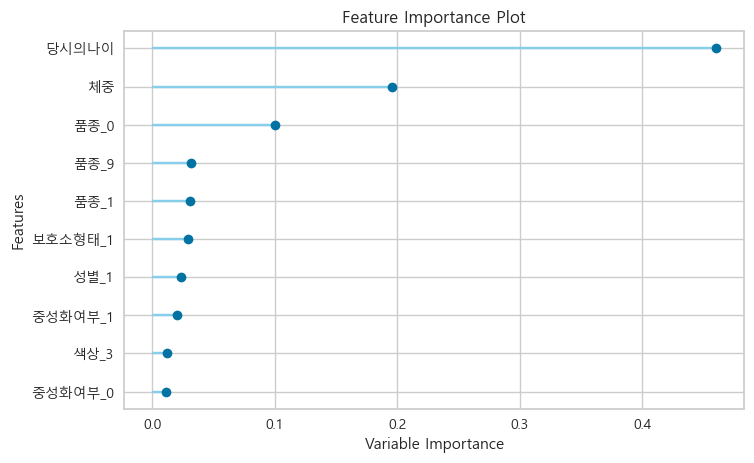

In [298]:
plot_model(tuned_lightgbm, plot = 'feature')

In [296]:
stacker = stack_models(estimator_list = best3models[1:], meta_model = best3models[0], fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6644,0.7017,0.8104,0.6736,0.7357,0.2869,0.2962
1,0.6628,0.6996,0.8146,0.6708,0.7358,0.2820,0.2923
2,0.6563,0.6940,0.7884,0.6719,0.7255,0.2736,0.2799
Mean,0.6612,0.6985,0.8045,0.6721,0.7323,0.2808,0.2895
SD,0.0035,0.0032,0.0115,0.0011,0.0048,0.0055,0.0070


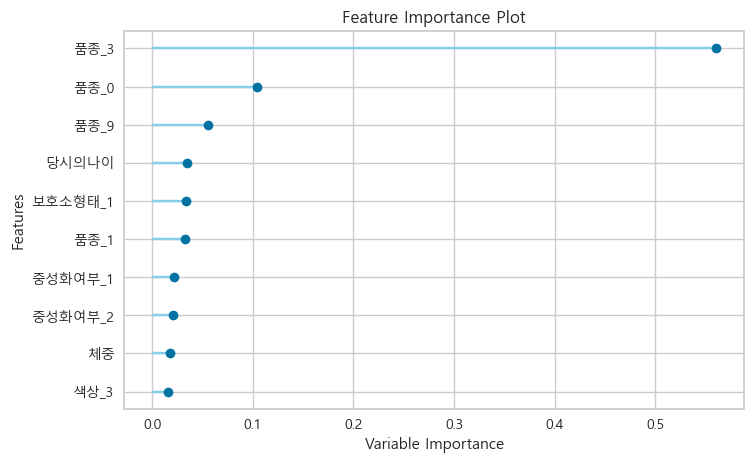

In [111]:
plot_model(xgboost, plot = 'feature')

In [112]:
catboost = create_model('catboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6935,0.7029,0.3815,0.6623,0.4841,0.2879,0.3101
1,0.6932,0.7014,0.3803,0.6618,0.4830,0.2868,0.3091
2,0.6906,0.7026,0.3738,0.6576,0.4767,0.2800,0.3025
3,0.6898,0.6993,0.3767,0.6534,0.4779,0.2792,0.3007
4,0.6923,0.7006,0.3779,0.6603,0.4807,0.2843,0.3067
Mean,0.6919,0.7014,0.3781,0.6591,0.4805,0.2837,0.3058
SD,0.0015,0.0013,0.0027,0.0033,0.0029,0.0035,0.0037


In [113]:
catboost

In [114]:
tuned_catboost = tune_model(catboost, fold = 5, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6927,0.7022,0.3728,0.6645,0.4776,0.2835,0.3073
1,0.6936,0.7009,0.3751,0.6661,0.4799,0.2860,0.3097
2,0.6897,0.7027,0.3665,0.6590,0.4710,0.2760,0.2998
3,0.6898,0.6982,0.3653,0.6598,0.4703,0.2757,0.2998
4,0.6916,0.7006,0.3703,0.6627,0.4751,0.2807,0.3046
Mean,0.6915,0.7009,0.3700,0.6624,0.4748,0.2804,0.3042
SD,0.0015,0.0016,0.0037,0.0027,0.0037,0.0041,0.0040


In [115]:
tuned_catboost

---

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred) : 
    log_y = np.log1(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [133]:
def rmse(y, pred) : 
    return np.sqrt(mean_squred_error(y, pred))

In [134]:
def evaluate_regr(y, pred) : 
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    pritn('RMSLE : [0:.3f], RMSE : {1:.3f}, MAE : {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [256]:
df_no_mix['품종'].value_counts()

7    38522
4    24494
0    16734
5     7141
8     3818
2     3805
1     3379
9     2194
6      684
Name: 품종, dtype: int64

In [206]:
scale = df_no_mix[['체중','당시의나이']]

In [233]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(scale)
scaled = scaler.transform(scale)
scaled = pd.DataFrame(data = scaled, columns = scale.columns)



In [234]:
scaled

,체중,당시의나이
0,-0.603070,-0.103570
1,-0.650797,-0.449952
2,-0.480341,-0.796333
3,-0.616706,0.589194
4,-0.343977,0.935576
...,...,...
100766,-0.207612,-1.142715
100767,0.065117,-1.142715
100768,-0.772162,-1.142715
100769,-0.787162,-1.142715


In [236]:
df_no_mix['체중스케일'] = scaled['체중'].values

In [237]:
df_no_mix.loc[:,'나이스케일'] = scaled['당시의나이'].values

In [238]:
df_no_mix.columns

Index(['품종', '색상', '성별', '중성화여부', '보호소형태', '상태', '체중스케일', '나이스케일'], dtype='object')

In [239]:
df_no_mix = df_no_mix[['품종', '색상', '성별', '중성화여부', '보호소형태', '상태', '체중스케일','나이스케일']]

In [240]:
df_no_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100771 entries, 0 to 361194
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   품종      100771 non-null  int64  
 1   색상      100771 non-null  int64  
 2   성별      100771 non-null  int64  
 3   중성화여부   100771 non-null  int64  
 4   보호소형태   100771 non-null  int64  
 5   상태      100771 non-null  int64  
 6   체중스케일   100771 non-null  float64
 7   나이스케일   100771 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 6.9 MB


In [241]:
df_no_mix

,품종,색상,성별,중성화여부,보호소형태,상태,체중스케일,나이스케일
0,7,1,0,0,1,1,-0.603070,-0.103570
2,4,4,1,0,1,1,-0.650797,-0.449952
3,4,3,0,1,1,1,-0.480341,-0.796333
4,7,3,1,1,1,1,-0.616706,0.589194
5,7,5,1,1,1,0,-0.343977,0.935576
...,...,...,...,...,...,...,...,...
361190,9,1,1,0,0,0,-0.207612,-1.142715
361191,9,3,0,0,0,0,0.065117,-1.142715
361192,9,5,1,0,0,0,-0.772162,-1.142715
361193,9,1,0,0,0,0,-0.787162,-1.142715


In [242]:
df_no_mix

,품종,색상,성별,중성화여부,보호소형태,상태,체중스케일,나이스케일
0,7,1,0,0,1,1,-0.603070,-0.103570
2,4,4,1,0,1,1,-0.650797,-0.449952
3,4,3,0,1,1,1,-0.480341,-0.796333
4,7,3,1,1,1,1,-0.616706,0.589194
5,7,5,1,1,1,0,-0.343977,0.935576
...,...,...,...,...,...,...,...,...
361190,9,1,1,0,0,0,-0.207612,-1.142715
361191,9,3,0,0,0,0,0.065117,-1.142715
361192,9,5,1,0,0,0,-0.772162,-1.142715
361193,9,1,0,0,0,0,-0.787162,-1.142715
